<a href="https://colab.research.google.com/github/VineetSivadasan/ONS_CAMDEN_CRIME_STATISTICS/blob/main/ONS_crime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
# import all three datasets and turn them into pandas dataframes 
df_crime = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/On_Street_Crime_In_Camden.csv')
df_ward_atlas = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ward-atlas-data.csv', encoding= 'unicode_escape')  #non-ascii characters in the csv that can not be encoded/decoded hence must use unicode escape
df_ward_profile = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ward-atlas-data.csv', encoding= 'unicode_escape')

In [78]:
df_crime.head()

,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
0,Other theft,1489515,Kings Cross (station),NaN,Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,04/01/2017 12:00:00 AM,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,This is only an approximation of where the cri...,11/07/2018,"(51.5318, -0.123189)"
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,NaN,Police Force,NaN,51520755,NaN,09/01/2016 12:00:00 AM,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,This is only an approximation of where the cri...,11/07/2018,"(51.528169, -0.131558)"
2,Theft from the person,965233,On or near Avenue Road,NaN,Investigation complete; no suspect identified,08/01/2015 12:00:00 AM,Police Force,NaN,42356413,915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,07/01/2015 12:00:00 AM,E05000144,Swiss Cottage,526716.88,184227.86,-0.174124,51.542741,This is only an approximation of where the cri...,05/05/2016,"(51.542741, -0.174124)"
3,Anti-social behaviour,960974,On or near Birkenhead Street,NaN,NaN,NaN,Police Force,NaN,59431385,NaN,08/01/2017 12:00:00 AM,E05000141,King's Cross,530390.22,182860.71,-0.121652,51.529611,This is only an approximation of where the cri...,03/11/2017,"(51.529611, -0.121652)"
4,Drugs,972275,On or near Oakeshott Avenue,NaN,Offender given a drugs possession warning,06/01/2015 12:00:00 AM,Police Force,NaN,41931981,bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,06/01/2015 12:00:00 AM,E05000137,Highgate,528335.87,186805.94,-0.149851,51.565544,This is only an approximation of where the cri...,21/08/2015,"(51.565544, -0.149851)"


In [79]:
# Look at the shape of the crime dataset and the types of data
df_crime.shape, df_crime.dtypes

((285107, 20), Category             object
 Street ID             int64
 Street Name          object
 Context             float64
 Outcome Category     object
 Outcome Date         object
 Service              object
 Location Subtype     object
 ID                    int64
 Persistent ID        object
 Epoch                object
 Ward Code            object
 Ward Name            object
 Easting             float64
 Northing            float64
 Longitude           float64
 Latitude            float64
 Spatial Accuracy     object
 Last Uploaded        object
 Location             object
 dtype: object)

In [80]:
#check to see if there are any NaN values in the dataset
checking_NaN = df_crime.isnull().values.any() 
checking_NaN

True

In [81]:
#locate rows where null values appear
NaN_rows = df_crime[df_crime.isnull().any(axis=1)]  
NaN_rows.shape

(285107, 20)

In [82]:
#locate columns where null values appear
NaN_columns = df_crime.isna().any()
NaN_columns

Category            False
Street ID           False
Street Name         False
Context              True
Outcome Category     True
Outcome Date         True
Service             False
Location Subtype     True
ID                  False
Persistent ID        True
Epoch               False
Ward Code           False
Ward Name           False
Easting             False
Northing            False
Longitude           False
Latitude            False
Spatial Accuracy    False
Last Uploaded       False
Location            False
dtype: bool

In [83]:
#find out how many rows in 'Context' column has NaN values
context_nan = df_crime.Context.isnull().values.ravel().sum()
context_nan


285107

In [84]:
#Given that all values in 'Context' are NaN values, drop this column
df_crime.drop(['Context'], axis=1, inplace=True)

In [85]:
#Given that 'Location' is just longitude and latitude values, drop this column
df_crime.drop(['Location'], axis=1, inplace=True)

In [86]:
#'Spatial Accuracy' doesn't give any useful information hence drop this column
df_crime.drop(['Spatial Accuracy'], axis=1, inplace=True)

In [87]:
df_crime.shape

(285107, 17)

In [88]:
#find out how many rows in 'Outcome Category' column has NaN values
outcome_cat_nan = df_crime['Outcome Category'].isnull().values.ravel().sum()
outcome_cat_nan

67292

In [89]:
#find out how many rows in 'Context' column has NaN values
outcome_date_nan = df_crime['Outcome Date'].isnull().values.ravel().sum()
outcome_date_nan


67292

In [90]:
#find out how many rows in 'Context' column has NaN values
location_nan = df_crime['Location Subtype'].isnull().values.ravel().sum()
location_nan

269410

In [91]:
#find out how many rows in 'Context' column has NaN values
persistent_nan = df_crime['Persistent ID'].isnull().values.ravel().sum()
persistent_nan

82519

In [92]:
#describe the Epoch column
df_crime['Epoch'].describe()

count                     285107
unique                        76
top       03/01/2019 12:00:00 AM
freq                        4694
Name: Epoch, dtype: object

# Let's look at the numbers of crimes committed across London for the time span of the dataset


In [93]:
#introduce a count of 1 for each crime 
df_crime['count'] = 1

In [94]:
df_crime.dtypes

Category             object
Street ID             int64
Street Name          object
Outcome Category     object
Outcome Date         object
Service              object
Location Subtype     object
ID                    int64
Persistent ID        object
Epoch                object
Ward Code            object
Ward Name            object
Easting             float64
Northing            float64
Longitude           float64
Latitude            float64
Last Uploaded        object
count                 int64
dtype: object

In [96]:
# Sum crimes by monthly date over the full dataset time period
total_crimes_bydate = df_crime.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_crimes_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude'], axis=1, inplace=True)     #remove all other columns
total_crimes_bydate['date'] = total_crimes_bydate.index        #create another column for the date, called date
total_crimes_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,3111,01/01/2015 12:00:00 AM
01/01/2016 12:00:00 AM,3244,01/01/2016 12:00:00 AM
01/01/2017 12:00:00 AM,3073,01/01/2017 12:00:00 AM
01/01/2018 12:00:00 AM,3802,01/01/2018 12:00:00 AM
01/01/2019 12:00:00 AM,4114,01/01/2019 12:00:00 AM
...,...,...
12/01/2016 12:00:00 AM,3420,12/01/2016 12:00:00 AM
12/01/2017 12:00:00 AM,3524,12/01/2017 12:00:00 AM
12/01/2018 12:00:00 AM,4057,12/01/2018 12:00:00 AM


In [101]:
#change the date format in 'Epoch' column and sort values in month order
total_crimes_bydate['date'] = pd.to_datetime(total_crimes_bydate['date']).dt.date
total_crimes_bydate['date'] = pd.to_datetime(total_crimes_bydate['date']).dt.strftime('%d-%m-%Y')
total_crimes_bydate['date'] = pd.to_datetime(total_crimes_bydate.date)
total_crimes_bydate = total_crimes_bydate.sort_values(by = 'date')
total_crimes_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,3111,2015-01-01
02/01/2015 12:00:00 AM,3028,2015-02-01
03/01/2015 12:00:00 AM,3412,2015-03-01
04/01/2015 12:00:00 AM,3399,2015-04-01
05/01/2015 12:00:00 AM,3602,2015-05-01
...,...,...
12/01/2020 12:00:00 AM,3049,2020-12-01
01/01/2021 12:00:00 AM,2691,2021-01-01
02/01/2021 12:00:00 AM,2746,2021-02-01


Text(0.5, 1.0, 'crimes across London')

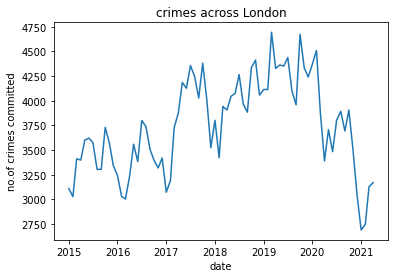

In [99]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_crimes_bydate['date'], total_crimes_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of crimes committed")
plt.title("crimes across London")

# Let's look at the categories of crimes

In [26]:
#describe the category column
df_crime['Category'].describe()

count                    285107
unique                       14
top       Anti-social behaviour
freq                      67292
Name: Category, dtype: object

In [27]:
#get all the unique categories of crime and the 'size' i.e. number of categories
C = len(df_crime['Category'].unique())
C, df_crime['Category'].unique()

(14, array(['Other theft', 'Anti-social behaviour', 'Theft from the person',
        'Drugs', 'Violence and sexual offences', 'Vehicle crime',
        'Possession of weapons', 'Burglary', 'Robbery', 'Public order',
        'Shoplifting', 'Other crime', 'Criminal damage and arson',
        'Bicycle theft'], dtype=object))

In [28]:
#create another category called 'category encoded' which contains the encoded crime categories. The coding of labels is done in alphabetical order
df_crime['Category encoded'] = df_crime['Category'].astype('category').cat.codes    #The crime labels in 'Category' are coded from 0 to 13 in alphabetical order

#to get the labels from the coded crime categories
c = df_crime.Category.astype('category') #create a new variable 'c', which is just the 'Category' column from the crime dataframe, as a category
d = dict(enumerate(c.cat.categories )) #build a dictionary, 'd' of all the labels from 'c' with each one numbered in alphabetical order from 0 to 13
df_crime.dtypes, df_crime, d

(Category             object
 Street ID             int64
 Street Name          object
 Outcome Category     object
 Outcome Date         object
 Service              object
 Location Subtype     object
 ID                    int64
 Persistent ID        object
 Epoch                object
 Ward Code            object
 Ward Name            object
 Easting             float64
 Northing            float64
 Longitude           float64
 Latitude            float64
 Last Uploaded        object
 count                 int64
 Category encoded       int8
 dtype: object,
                             Category  Street ID  ... count Category encoded
 0                        Other theft    1489515  ...     1                6
 1              Anti-social behaviour     960522  ...     1                0
 2              Theft from the person     965233  ...     1               11
 3              Anti-social behaviour     960974  ...     1                0
 4                              Drugs     972275

Text(0, 0.5, 'Latitude')

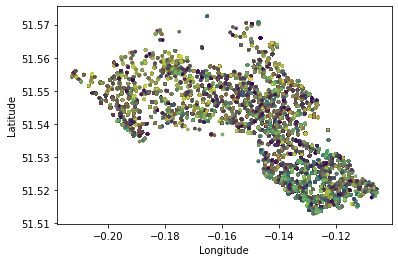

In [29]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_crime['Longitude'], df_crime['Latitude'], c=df_crime['Category encoded'],  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Let's look at ward

In [30]:
#describe the category column
df_crime['Ward Name'].describe()

count                        285107
unique                           18
top       Holborn and Covent Garden
freq                          40616
Name: Ward Name, dtype: object

In [31]:
#get all the unique Wards and the 'size' i.e. number of Wards
C = len(df_crime['Ward Name'].unique())
C, df_crime['Ward Name'].unique()

(18, array(['St Pancras and Somers Town', 'Swiss Cottage', "King's Cross",
        'Highgate', 'Camden Town with Primrose Hill', 'Haverstock',
        'Frognal and Fitzjohns', 'Belsize', 'Bloomsbury', 'Cantelowes',
        'Kilburn', 'Kentish Town', 'West Hampstead', 'Fortune Green',
        'Holborn and Covent Garden', "Regent's Park", 'Gospel Oak',
        'Hampstead Town'], dtype=object))

In [32]:
#create another category called 'ward encoded' which contains the encoded ward names,
df_crime['Ward encoded'] = df_crime['Ward Name'].astype('category')
df_crime['Ward encoded'] = df_crime['Ward encoded'].cat.codes
df_crime.dtypes, df_crime

(Category             object
 Street ID             int64
 Street Name          object
 Outcome Category     object
 Outcome Date         object
 Service              object
 Location Subtype     object
 ID                    int64
 Persistent ID        object
 Epoch                object
 Ward Code            object
 Ward Name            object
 Easting             float64
 Northing            float64
 Longitude           float64
 Latitude            float64
 Last Uploaded        object
 count                 int64
 Category encoded       int8
 Ward encoded           int8
 dtype: object,
                             Category  Street ID  ... Category encoded Ward encoded
 0                        Other theft    1489515  ...                6           15
 1              Anti-social behaviour     960522  ...                0           15
 2              Theft from the person     965233  ...               11           16
 3              Anti-social behaviour     960974  ...               

Text(0, 0.5, 'Latitude')

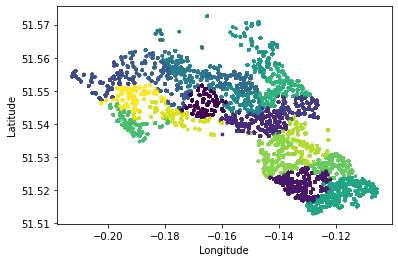

In [33]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_crime['Longitude'],df_crime['Latitude'], c=df_crime['Ward encoded'], s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [34]:
total_crimes_byward = df_crime.groupby(['Ward Name']).sum()      #sum 'count' number of crimes by date
total_crimes_byward.drop(['Street ID', 'Easting', 'Ward encoded','Northing', 'Category encoded', 'Longitude', 'Latitude', 'ID'], axis=1, inplace=True)     #remove all other columns
total_crimes_byward['Ward name'] = total_crimes_byward.index
total_crimes_byward

,count,Ward name
Ward Name,,
Belsize,8108,Belsize
Bloomsbury,36759,Bloomsbury
Camden Town with Primrose Hill,30958,Camden Town with Primrose Hill
Cantelowes,9895,Cantelowes
Fortune Green,7758,Fortune Green
Frognal and Fitzjohns,6239,Frognal and Fitzjohns
Gospel Oak,7725,Gospel Oak
Hampstead Town,8297,Hampstead Town
Haverstock,10225,Haverstock


In [35]:
# export the 'cleaned' df_crime dataframe as a csv file 
total_crimes_byward.to_csv('total_crimes_byward.csv', index=False)

Text(0, 0.5, 'crime count')

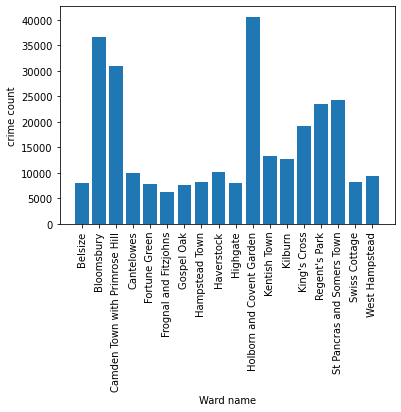

In [36]:
#plot of crime numbers by ward
plt.bar(total_crimes_byward['Ward name'],total_crimes_byward['count']) 
plt.xlabel('Ward name')
plt.xticks(rotation=90)
plt.ylabel('crime count')

#Let's look at street name

In [37]:
#describe the category column
df_crime['Street Name'].describe()

count                     285107
unique                      1208
top       On or near Supermarket
freq                       10377
Name: Street Name, dtype: object

In [38]:
#get all the street names and the 'size' i.e. number of unique streets
C = len(df_crime['Street Name'].unique())
C, df_crime['Street Name'].unique()

(1208, array(['Kings Cross (station)', 'On or near Wellesley Place',
        'On or near Avenue Road', ..., 'Stockwell (lu Station)',
        'South Hampstead (station)', 'Maidenhead (station)'], dtype=object))

In [39]:
total_crimes_bystreet = df_crime.groupby(['Street Name']).sum()      #sum 'count' number of crimes by date
total_crimes_bystreet.drop([ 'Easting', 'Northing', 'Ward encoded', 'Category encoded', 'Longitude', 'Latitude', 'ID', 'Street ID'], axis=1, inplace=True)     #remove all other columns
total_crimes_bystreet['Street'] = total_crimes_bystreet.index        #create another column for the street ID, called Street
total_crimes_bystreet.sort_values(by = 'count')

,count,Street
Street Name,,
On or near Bloomsbury Square,1,On or near Bloomsbury Square
South Hampstead,1,South Hampstead
On or near Powis Place,2,On or near Powis Place
On or near Birchwood Drive,3,On or near Birchwood Drive
On or near Osnaburgh Terrace,3,On or near Osnaburgh Terrace
...,...,...
On or near Further/higher Educational Building,5399,On or near Further/higher Educational Building
On or near Parking Area,6825,On or near Parking Area
On or near Theatre/concert Hall,7795,On or near Theatre/concert Hall


In [40]:
#collect street names where more than 1000 crimes have been committed over the 7 year period
total_crimes_bystreet_important = total_crimes_bystreet[(total_crimes_bystreet['count'] > 1000)]
total_crimes_bystreet_important

,count,Street
Street Name,,
Euston (lu Station),1210,Euston (lu Station)
Euston (station),1653,Euston (station)
Kings Cross (station),1915,Kings Cross (station)
On or near Adelaide Road,1016,On or near Adelaide Road
On or near Camden High Street,3134,On or near Camden High Street
On or near Conference/exhibition Centre,2325,On or near Conference/exhibition Centre
On or near Further/higher Educational Building,5399,On or near Further/higher Educational Building
On or near Goodge Street,1041,On or near Goodge Street
On or near Goods Way,1066,On or near Goods Way


Text(0, 0.5, 'count')

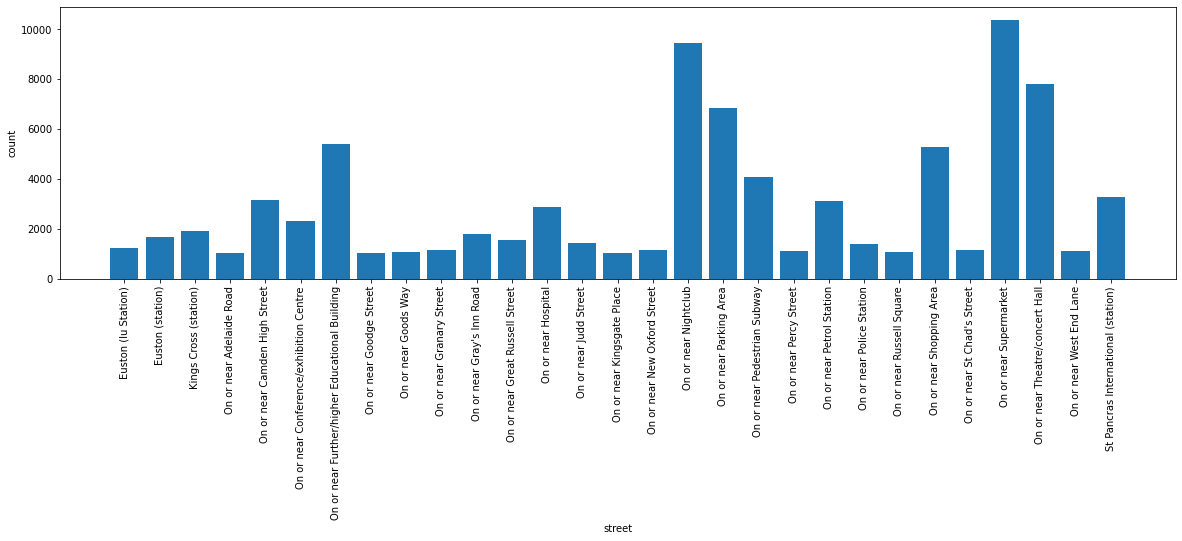

In [41]:
#plot street name locations of the crimes against frequency for frequencies greater than 1000
plt.figure(figsize=(20,5))
plt.bar(total_crimes_bystreet_important['Street'],total_crimes_bystreet_important['count']) #, c=df_crime['Ward encoded'], s=6,  alpha=0.25)
plt.xlabel('street')
plt.xticks(rotation=90)
plt.ylabel('count')

In [44]:
# See what sorts of crimes are being committed 'on or near Supermarkets'
df_supermarket = df_crime[df_crime['Street Name'] == 'On or near Supermarket']
df_supermarket_cat = df_supermarket.groupby(['Category encoded']).sum()
df_supermarket_cat['Category'] = ['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other crime',
                                  'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
                                  'Vehicle crime', 'Violence and sexual offences']
#df_supermarket_cat.drop(['Street ID',	'ID',	'Easting',	'Northing',	'Longitude',	'Latitude',	'Ward encoded', 'Street ID encoded', 'Street name encoded'], axis=1, inplace=True)

In [45]:
df_supermarket

,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded
14,Violence and sexual offences,967943,On or near Supermarket,Under investigation,03/01/2017 12:00:00 AM,Police Force,NaN,55580264,adef0ec085796c97a9dbca411af4b41adc33838025e704...,03/01/2017 12:00:00 AM,E05000128,Belsize,527508.87,184588.86,-0.162579,51.545807,20/06/2017,1,13,0
83,Drugs,964903,On or near Supermarket,Awaiting court outcome,01/01/2017 12:00:00 AM,Police Force,NaN,54103655,8d1dd1f1d8a5db395fe6605a9b0872313c4c0147e90e36...,01/01/2017 12:00:00 AM,E05000130,Camden Town with Primrose Hill,529032.87,184038.94,-0.140815,51.540519,20/06/2017,1,4,2
153,Public order,961057,On or near Supermarket,Under investigation,07/01/2017 12:00:00 AM,Police Force,NaN,59006709,3f89913cf13f10568b6902b7cff9bc6803a97bc8406b61...,07/01/2017 12:00:00 AM,E05000138,Holborn and Covent Garden,530807.22,181631.72,-0.116100,51.518470,03/11/2017,1,8,10
173,Shoplifting,956642,On or near Supermarket,Offender given a caution,05/01/2016 12:00:00 AM,Police Force,NaN,48875086,d94c8476588645b2e12c7a4d4f150d0dfb3642f0500d6e...,05/01/2016 12:00:00 AM,E05000129,Bloomsbury,529743.22,181466.80,-0.131487,51.517233,11/07/2018,1,10,1
190,Other theft,961057,On or near Supermarket,Under investigation,02/01/2018 12:00:00 AM,Police Force,NaN,63301064,3baec9b674177b48b22ab949f54905fb58f9e8ce65cd3c...,02/01/2018 12:00:00 AM,E05000138,Holborn and Covent Garden,530807.22,181631.72,-0.116100,51.518470,13/04/2018,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284876,Shoplifting,960761,On or near Supermarket,Investigation complete; no suspect identified,04/01/2020 12:00:00 AM,Police Force,NaN,82521901,c5e7994cd7ffc777d68f2d14eed7fd0567e46dcf4cd3be...,03/01/2020 12:00:00 AM,E05000129,Bloomsbury,529527.27,181767.74,-0.134487,51.519987,11/06/2021,1,10,1
284988,Other theft,960761,On or near Supermarket,Status update unavailable,02/01/2020 12:00:00 AM,Police Force,NaN,78759482,1c4127e0f43a8f921941be017d339cca93baa730709ed0...,10/01/2019 12:00:00 AM,E05000129,Bloomsbury,529527.27,181767.74,-0.134487,51.519987,11/06/2021,1,6,1
285017,Theft from the person,956642,On or near Supermarket,Investigation complete; no suspect identified,03/01/2020 12:00:00 AM,Police Force,NaN,81117877,c7805347ee7661e6ddb06a619daf577e06dff8d8060c46...,02/01/2020 12:00:00 AM,E05000129,Bloomsbury,529743.22,181466.80,-0.131487,51.517233,11/06/2021,1,11,1
285037,Shoplifting,964904,On or near Supermarket,Under investigation,02/01/2021 12:00:00 AM,Police Force,NaN,90744076,b9186cbff333affc3ef2f2fb7400912d12141c3bd1f1d8...,02/01/2021 12:00:00 AM,E05000130,Camden Town with Primrose Hill,528956.26,183681.69,-0.142012,51.537318,11/06/2021,1,10,2


In [46]:
df_supermarket_cat

,Street ID,ID,Easting,Northing,Longitude,Latitude,count,Ward encoded,Category
Category encoded,,,,,,,,,
0,604738302,41443280346,3.317188e+08,1.150778e+08,-96.003259,32363.076872,628,5554.0,Anti-social behaviour
1,275436794,19213198842,1.513047e+08,5.242455e+07,-40.324622,14738.693475,286,2039.0,Bicycle theft
2,366582321,24587728454,2.007663e+08,6.983370e+07,-57.373443,19584.546146,380,2858.0,Burglary
3,246063883,15958362288,1.347781e+08,4.689477e+07,-37.719112,13142.543073,255,1981.0,Criminal damage and arson
4,212249860,13762762035,1.162796e+08,4.045389e+07,-32.537812,11338.625607,220,1316.0,Drugs
5,62660489,3923904436,3.435655e+07,1.193706e+07,-9.601608,3349.911351,65,367.0,Other crime
6,2225199535,144685921657,1.223069e+09,4.229264e+08,-327.240712,119138.564090,2312,15729.0,Other theft
7,39547554,2883608194,2.167038e+07,7.534254e+06,-6.064103,2113.063561,41,243.0,Possession of weapons
8,573774185,38424446685,3.145315e+08,1.093295e+08,-87.335895,30665.098459,595,4445.0,Public order


Text(0.5, 1.0, 'crimes occuring on or near supermarket')

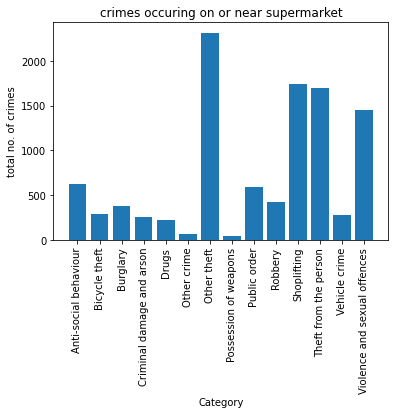

In [47]:
plt.bar(df_supermarket_cat['Category'], df_supermarket_cat['count'])
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('total no. of crimes')
plt.title('crimes occuring on or near supermarket')

In [48]:
# Get the unique ward names from 'On or near supermarket' crimes
df_supermarket['Ward Name'].unique()

array(['Belsize', 'Camden Town with Primrose Hill',
       'Holborn and Covent Garden', 'Bloomsbury', 'Kilburn', 'Haverstock',
       'Kentish Town', 'Swiss Cottage', "Regent's Park",
       'Frognal and Fitzjohns'], dtype=object)

In [49]:
# group 'on or near supermarket' crimes by each ward to see which ward has the most number of 'on or near supermarket' crimes
df_supermarket_byward = df_supermarket.groupby(['Ward Name']).sum()
df_supermarket_byward

,Street ID,ID,Easting,Northing,Longitude,Latitude,count,Category encoded,Ward encoded
Ward Name,,,,,,,,,
Belsize,746259749,51072743262,4.066053e+08,1.425490e+08,-126.741549,39743.911681,771,5565.0,0.0
Bloomsbury,1749335729,120802610368,9.666007e+08,3.314297e+08,-242.486775,94021.266339,1825,14770.0,1825.0
Camden Town with Primrose Hill,1657843984,105832395477,9.084565e+08,3.160758e+08,-247.993202,88545.771520,1718,14237.0,3436.0
Frognal and Fitzjohns,112261900,7590513585,6.105333e+07,2.154103e+07,-20.794276,5980.500640,116,1022.0,580.0
Haverstock,621541144,38554862026,3.402537e+08,1.187204e+08,-96.988332,33193.983088,644,6000.0,5152.0
Holborn and Covent Garden,1661244058,110352416376,9.201913e+08,3.148084e+08,-204.676896,89331.816656,1734,14466.0,17340.0
Kentish Town,1347573119,91351317409,7.363658e+08,2.577095e+08,-196.103463,71758.129799,1392,12057.0,15312.0
Kilburn,816733841,54072717407,4.444561e+08,1.554645e+08,-163.946817,43601.884267,846,7561.0,10152.0
Regent's Park,592749432,39507201444,3.265034e+08,1.125054e+08,-85.950568,31791.069995,617,3714.0,8638.0


Text(0, 0.5, 'count')

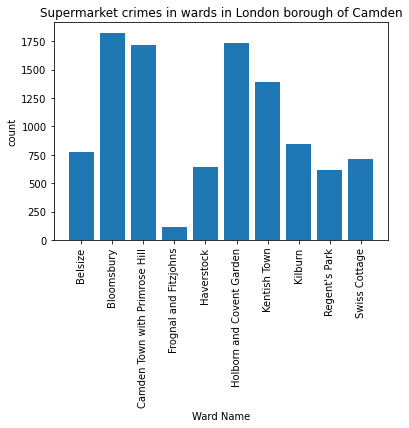

In [50]:
plt.bar(df_supermarket_byward.index, df_supermarket_byward['count'])
plt.xlabel('Ward Name')
plt.xticks(rotation=90)
plt.title('Supermarket crimes in wards in London borough of Camden')
plt.ylabel('count')

In [51]:
df_supermarket_belsize      = df_supermarket[df_supermarket['Ward Name'] == 'Belsize']
df_supermarket_camden       = df_supermarket[df_supermarket['Ward Name'] == "Camden Town with Primrose Hill"]
df_supermarket_holborn      = df_supermarket[df_supermarket['Ward Name'] == 'Holborn and Covent Garden']
df_supermarket_bloomsbury   = df_supermarket[df_supermarket['Ward Name'] == 'Bloomsbury']
df_supermarket_kilburn      = df_supermarket[df_supermarket['Ward Name'] == "Kilburn"]
df_supermarket_haverstock   = df_supermarket[df_supermarket['Ward Name'] == "Haverstock"]
df_supermarket_kentish      = df_supermarket[df_supermarket['Ward Name'] == 'Kentish Town']
df_supermarket_swiss        = df_supermarket[df_supermarket['Ward Name'] == 'Swiss Cottage']
df_supermarket_regent       = df_supermarket[df_supermarket['Ward Name'] == "Regent's Park"]
df_supermarket_forgnal      = df_supermarket[df_supermarket['Ward Name'] == "Frognal and Fitzjohns"]

In [54]:
# See what sorts of crimes are being committed 'on or near Nightclub'
df_nightclub = df_crime[df_crime['Street Name'] == 'On or near Nightclub']
df_nightclub_cat = df_nightclub.groupby(['Category encoded']).sum()
df_nightclub_cat['Category'] = ['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other crime',
                                  'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
                                  'Vehicle crime', 'Violence and sexual offences']
#df_nightclub_cat.drop(['Street ID',	'ID',	'Easting',	'Northing',	'Longitude',	'Latitude',	'Ward encoded', 'Street ID encoded', 'Street name encoded'], axis=1, inplace=True)

In [55]:
df_nightclub['Ward Name'].unique()

array(['Camden Town with Primrose Hill', 'West Hampstead',
       'Holborn and Covent Garden', 'Haverstock', "Regent's Park",
       'Bloomsbury'], dtype=object)

In [56]:
df_nightclub_byward = df_nightclub.groupby(['Ward Name']).sum()
df_nightclub_byward

,Street ID,ID,Easting,Northing,Longitude,Latitude,count,Category encoded,Ward encoded
Ward Name,,,,,,,,,
Bloomsbury,382333432,25459519494,2.106767e+08,7.247019e+07,-54.565658,20506.110896,398,2862.0,398.0
Camden Town with Primrose Hill,4922494599,319152176122,2.697496e+09,9.387603e+08,-734.021859,262908.208279,5101,40165.0,10202.0
Haverstock,282781332,17417600117,1.548312e+08,5.400383e+07,-43.750467,15102.133281,293,2634.0,2344.0
Holborn and Covent Garden,1498656134,100455118931,8.291958e+08,2.836388e+08,-180.310075,80471.207848,1562,11495.0,15620.0
Regent's Park,228681774,14656197466,1.253749e+08,4.352636e+07,-33.485019,12214.286301,237,1896.0,3318.0
West Hampstead,1800901917,123459670745,9.787799e+08,3.439778e+08,-344.341675,95931.504251,1861,12866.0,31637.0


Text(0, 0.5, 'count')

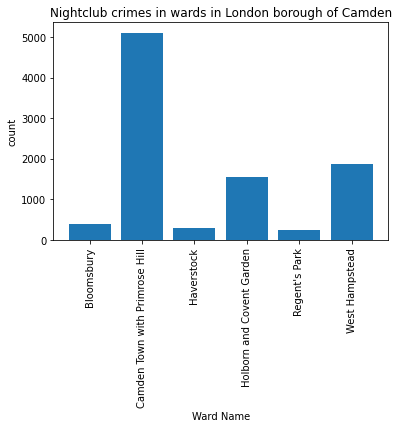

In [57]:
plt.bar(df_nightclub_byward.index, df_nightclub_byward['count'])
plt.xlabel('Ward Name')
plt.xticks(rotation=90)
plt.title('Nightclub crimes in wards in London borough of Camden')
plt.ylabel('count')

In [58]:
df_nightclub_cat

,Street ID,ID,Easting,Northing,Longitude,Latitude,count,Ward encoded,Category
Category encoded,,,,,,,,,
0,946693874,65224811293,5.183282e+08,1.803105e+08,-147.612134,50559.307392,981,8001.0,Anti-social behaviour
1,147458649,10080094128,8.091677e+07,2.805970e+07,-21.941033,7884.820818,153,1145.0,Bicycle theft
2,379893332,25934413739,2.080527e+08,7.236287e+07,-61.092895,20305.714258,394,4020.0,Burglary
3,228664594,14710343895,1.252033e+08,4.357870e+07,-35.940207,12214.795358,237,1926.0,Criminal damage and arson
4,700578175,43368315750,3.838443e+08,1.336050e+08,-105.584425,37418.400646,726,2150.0,Drugs
5,40540762,2498675435,2.217682e+07,7.728461e+06,-6.526959,2164.700576,42,345.0,Other crime
6,1833064532,119421953660,1.005743e+09,3.489474e+08,-275.074756,98020.323541,1902,13588.0,Other theft
7,31840430,2190615707,1.744344e+07,6.071214e+06,-4.857713,1700.821626,33,130.0,Possession of weapons
8,438980626,29067683064,2.404218e+08,8.366515e+07,-68.239039,23450.346032,455,3162.0,Public order


Text(0.5, 1.0, 'crimes occuring on or near Nightclub')

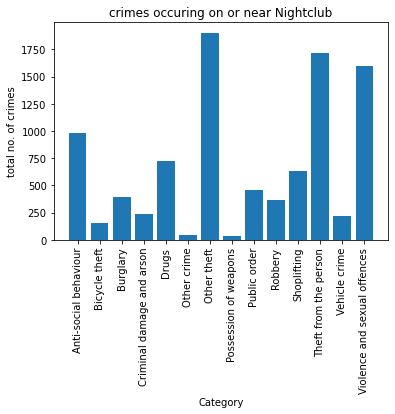

In [59]:
plt.bar(df_nightclub_cat['Category'], df_nightclub_cat['count'])
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('total no. of crimes')
plt.title('crimes occuring on or near Nightclub')

#Let's encode street names and street IDs

In [60]:
#create another category called 'ward encoded' which contains the encoded ward names,
df_crime

,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded
0,Other theft,1489515,Kings Cross (station),Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,04/01/2017 12:00:00 AM,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,11/07/2018,1,6,15
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,Police Force,NaN,51520755,NaN,09/01/2016 12:00:00 AM,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,11/07/2018,1,0,15
2,Theft from the person,965233,On or near Avenue Road,Investigation complete; no suspect identified,08/01/2015 12:00:00 AM,Police Force,NaN,42356413,915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,07/01/2015 12:00:00 AM,E05000144,Swiss Cottage,526716.88,184227.86,-0.174124,51.542741,05/05/2016,1,11,16
3,Anti-social behaviour,960974,On or near Birkenhead Street,NaN,NaN,Police Force,NaN,59431385,NaN,08/01/2017 12:00:00 AM,E05000141,King's Cross,530390.22,182860.71,-0.121652,51.529611,03/11/2017,1,0,13
4,Drugs,972275,On or near Oakeshott Avenue,Offender given a drugs possession warning,06/01/2015 12:00:00 AM,Police Force,NaN,41931981,bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,06/01/2015 12:00:00 AM,E05000137,Highgate,528335.87,186805.94,-0.149851,51.565544,21/08/2015,1,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285102,Theft from the person,960590,On or near Further/higher Educational Building,Investigation complete; no suspect identified,02/01/2021 12:00:00 AM,Police Force,NaN,89122019,4a3a5bf8ad595c876ffe511f324ac6747f73e919899936...,12/01/2020 12:00:00 AM,E05000129,Bloomsbury,529587.23,182301.71,-0.133427,51.524772,11/06/2021,1,11,1
285103,Bicycle theft,965106,On or near Crogsland Road,Investigation complete; no suspect identified,07/01/2020 12:00:00 AM,Police Force,NaN,85535188,713fa4406dc2cc7d7a358a6850e83d26231b1c4f0d7cc4...,07/01/2020 12:00:00 AM,E05000136,Haverstock,528245.25,184505.68,-0.151958,51.544885,11/06/2021,1,1,8
285104,Theft from the person,956623,On or near New Oxford Street,Investigation complete; no suspect identified,08/01/2020 12:00:00 AM,Police Force,NaN,86477977,69fbc9f7c0879fbd1b6a6e9da575080d20761a2e582671...,08/01/2020 12:00:00 AM,E05000129,Bloomsbury,529978.23,181417.72,-0.128120,51.516738,11/06/2021,1,11,1
285105,Violence and sexual offences,1490576,Stockwell (lu Station),Under investigation,04/01/2021 12:00:00 AM,British Transport Police,London Underground Station,92235600,NaN,04/01/2021 12:00:00 AM,E05000138,Holborn and Covent Garden,530354.22,181743.26,-0.122584,51.519577,11/06/2021,1,13,10


In [61]:
#create another category called 'ward encoded' which contains the encoded ward names,
df_crime['Street ID encoded'] = df_crime['Street ID'].astype('category')
df_crime['Street ID encoded'] = df_crime['Street ID encoded'].cat.codes
df_crime.sort_values(by = 'Street ID')

,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded,Street ID encoded
157062,Anti-social behaviour,587590,On or near A40,NaN,NaN,Police Force,NaN,49559541,NaN,06/01/2016 12:00:00 AM,E05000138,Holborn and Covent Garden,531398.25,181576.75,-0.107607,51.517839,11/07/2018,1,0,10,0
63586,Anti-social behaviour,587590,On or near A40,NaN,NaN,Police Force,NaN,69563065,NaN,10/01/2018 12:00:00 AM,E05000138,Holborn and Covent Garden,531398.25,181576.75,-0.107607,51.517839,16/01/2019,1,0,10,0
19936,Anti-social behaviour,587590,On or near A40,NaN,NaN,Police Force,NaN,77026560,NaN,08/01/2019 12:00:00 AM,E05000138,Holborn and Covent Garden,531398.25,181576.75,-0.107607,51.517839,28/10/2019,1,0,10,0
88600,Anti-social behaviour,587590,On or near A40,NaN,NaN,Police Force,NaN,72326178,0696d5cba9eaef5fac2506a55c5e974fd786bfb63e2543...,02/01/2019 12:00:00 AM,E05000138,Holborn and Covent Garden,531398.25,181576.75,-0.107607,51.517839,28/10/2019,1,0,10,0
198482,Anti-social behaviour,587590,On or near A40,NaN,NaN,Police Force,NaN,55498098,a53e658c6e6d72a3c1d6f7ec86eb629f09e9aa4c714713...,08/01/2016 12:00:00 AM,E05000138,Holborn and Covent Garden,531398.25,181576.75,-0.107607,51.517839,11/07/2018,1,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269338,Other theft,1490647,West Hampstead (station),Status update unavailable,07/01/2020 12:00:00 AM,British Transport Police,Station,89399285,NaN,03/01/2020 12:00:00 AM,E05000145,West Hampstead,525526.26,184731.82,-0.191067,51.547528,11/06/2021,1,6,17,1541
251244,Public order,1490652,Maidenhead (station),Under investigation,04/01/2021 12:00:00 AM,British Transport Police,Station,92237204,NaN,04/01/2021 12:00:00 AM,E05000130,Camden Town with Primrose Hill,529100.23,184075.69,-0.139793,51.540826,11/06/2021,1,8,2,1542
272710,Violence and sexual offences,1490652,Maidenhead (station),Under investigation,04/01/2021 12:00:00 AM,British Transport Police,Station,92237202,NaN,04/01/2021 12:00:00 AM,E05000130,Camden Town with Primrose Hill,529100.23,184075.69,-0.139793,51.540826,11/06/2021,1,13,2,1542
224075,Violence and sexual offences,1490652,Maidenhead (station),Under investigation,04/01/2021 12:00:00 AM,British Transport Police,Station,92237203,NaN,04/01/2021 12:00:00 AM,E05000130,Camden Town with Primrose Hill,529100.23,184075.69,-0.139793,51.540826,11/06/2021,1,13,2,1542


In [62]:
#encode street names
df_crime['Street name encoded'] = df_crime['Street Name'].astype('category')
df_crime['Street name encoded'] = df_crime['Street name encoded'].cat.codes
df_crime

,Category,Street ID,Street Name,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Last Uploaded,count,Category encoded,Ward encoded,Street ID encoded,Street name encoded
0,Other theft,1489515,Kings Cross (station),Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,04/01/2017 12:00:00 AM,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,11/07/2018,1,6,15,1531,39
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,Police Force,NaN,51520755,NaN,09/01/2016 12:00:00 AM,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,11/07/2018,1,0,15,127,1138
2,Theft from the person,965233,On or near Avenue Road,Investigation complete; no suspect identified,08/01/2015 12:00:00 AM,Police Force,NaN,42356413,915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,07/01/2015 12:00:00 AM,E05000144,Swiss Cottage,526716.88,184227.86,-0.174124,51.542741,05/05/2016,1,11,16,821,97
3,Anti-social behaviour,960974,On or near Birkenhead Street,NaN,NaN,Police Force,NaN,59431385,NaN,08/01/2017 12:00:00 AM,E05000141,King's Cross,530390.22,182860.71,-0.121652,51.529611,03/11/2017,1,0,13,416,152
4,Drugs,972275,On or near Oakeshott Avenue,Offender given a drugs possession warning,06/01/2015 12:00:00 AM,Police Force,NaN,41931981,bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,06/01/2015 12:00:00 AM,E05000137,Highgate,528335.87,186805.94,-0.149851,51.565544,21/08/2015,1,4,9,1437,819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285102,Theft from the person,960590,On or near Further/higher Educational Building,Investigation complete; no suspect identified,02/01/2021 12:00:00 AM,Police Force,NaN,89122019,4a3a5bf8ad595c876ffe511f324ac6747f73e919899936...,12/01/2020 12:00:00 AM,E05000129,Bloomsbury,529587.23,182301.71,-0.133427,51.524772,11/06/2021,1,11,1,195,442
285103,Bicycle theft,965106,On or near Crogsland Road,Investigation complete; no suspect identified,07/01/2020 12:00:00 AM,Police Force,NaN,85535188,713fa4406dc2cc7d7a358a6850e83d26231b1c4f0d7cc4...,07/01/2020 12:00:00 AM,E05000136,Haverstock,528245.25,184505.68,-0.151958,51.544885,11/06/2021,1,1,8,737,312
285104,Theft from the person,956623,On or near New Oxford Street,Investigation complete; no suspect identified,08/01/2020 12:00:00 AM,Police Force,NaN,86477977,69fbc9f7c0879fbd1b6a6e9da575080d20761a2e582671...,08/01/2020 12:00:00 AM,E05000129,Bloomsbury,529978.23,181417.72,-0.128120,51.516738,11/06/2021,1,11,1,100,798
285105,Violence and sexual offences,1490576,Stockwell (lu Station),Under investigation,04/01/2021 12:00:00 AM,British Transport Police,London Underground Station,92235600,NaN,04/01/2021 12:00:00 AM,E05000138,Holborn and Covent Garden,530354.22,181743.26,-0.122584,51.519577,11/06/2021,1,13,10,1540,1197


In [63]:
df_crime_street_reduced = df_crime.drop(['Category', 'Outcome Category', 'Easting', 'Ward encoded','Northing', 'Category encoded', 'Longitude', 'Latitude', 'ID', 'Outcome Date', 'Service', 'Location Subtype',	'ID', 'Persistent ID', 'Epoch', 'Ward Code', 'Ward Name', 'Last Uploaded'], axis=1, )     #remove all other columns
df_crime_street_reduced.sort_values(by = 'Street ID')

,Street ID,Street Name,count,Street ID encoded,Street name encoded
157062,587590,On or near A40,1,0,47
63586,587590,On or near A40,1,0,47
19936,587590,On or near A40,1,0,47
88600,587590,On or near A40,1,0,47
198482,587590,On or near A40,1,0,47
...,...,...,...,...,...
269338,1490647,West Hampstead (station),1,1541,1204
251244,1490652,Maidenhead (station),1,1542,44
272710,1490652,Maidenhead (station),1,1542,44
224075,1490652,Maidenhead (station),1,1542,44


# PMCC Matrix

In [64]:
df_cor_matrix = df_crime.drop(['count'], axis=1)

In [65]:
corr_matrix_crime = df_cor_matrix.corr()
corr_matrix_crime.style.background_gradient(cmap='coolwarm')

,Street ID,ID,Easting,Northing,Longitude,Latitude,Category encoded,Ward encoded,Street ID encoded,Street name encoded
Street ID,1.000000,0.062728,0.116671,-0.053576,0.117169,-0.055920,0.111079,0.196558,0.471608,-0.152493
ID,0.062728,1.000000,-0.011883,0.016033,-0.011234,0.015879,-0.031709,0.016371,0.051350,-0.007211
Easting,0.116671,-0.011883,1.000000,-0.659288,0.999862,-0.675444,0.005511,-0.000733,-0.442721,0.014345
Northing,-0.053576,0.016033,-0.659288,1.000000,-0.646704,0.999765,-0.008083,-0.019600,0.763847,-0.049691
Longitude,0.117169,-0.011234,0.999862,-0.646704,1.000000,-0.663098,0.005413,-0.001184,-0.432230,0.013451
Latitude,-0.055920,0.015879,-0.675444,0.999765,-0.663098,1.000000,-0.008088,-0.019249,0.761897,-0.049151
Category encoded,0.111079,-0.031709,0.005511,-0.008083,0.005413,-0.008088,1.000000,-0.004537,0.058839,0.012995
Ward encoded,0.196558,0.016371,-0.000733,-0.019600,-0.001184,-0.019249,-0.004537,1.000000,0.098006,-0.065837
Street ID encoded,0.471608,0.051350,-0.442721,0.763847,-0.432230,0.761897,0.058839,0.098006,1.000000,-0.129509
Street name encoded,-0.152493,-0.007211,0.014345,-0.049691,0.013451,-0.049151,0.012995,-0.065837,-0.129509,1.000000


In [66]:
df_crime.shape

(285107, 22)

In [67]:
# export the 'cleaned' df_crime dataframe as a csv file 
df_crime.to_csv('df_crime_cleaned.csv', index=False)